In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data= pd.read_excel('Participants_Data/Data_Train.xlsx')
print('Train data shape: ', train_data.shape)

Train data shape:  (6237, 9)


In [3]:
train_data.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         6237 non-null   object 
 1   Author        6237 non-null   object 
 2   Edition       6237 non-null   object 
 3   Reviews       6237 non-null   object 
 4   Ratings       6237 non-null   object 
 5   Synopsis      6237 non-null   object 
 6   Genre         6237 non-null   object 
 7   BookCategory  6237 non-null   object 
 8   Price         6237 non-null   float64
dtypes: float64(1), object(8)
memory usage: 438.7+ KB


In [5]:
train_data.describe()

,Price
count,6237.000000
mean,560.707516
std,690.110657
min,25.000000
25%,249.180000
50%,373.000000
75%,599.000000
max,14100.000000


In [6]:
train_data.isnull().sum()

Title           0
Author          0
Edition         0
Reviews         0
Ratings         0
Synopsis        0
Genre           0
BookCategory    0
Price           0
dtype: int64

In [7]:
train_data['Reviews']=train_data['Reviews'].apply(lambda x: float(x.split()[0]))
train_data['Ratings'] = train_data['Ratings'].apply(lambda x: (x.split()[0].replace(',',''))).astype(float)
train_data['Edition']=train_data['Edition'].apply(lambda x: x.split()[-1] if x.split()[-1].isdigit() else '2018')
print(train_data.info())
train_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         6237 non-null   object 
 1   Author        6237 non-null   object 
 2   Edition       6237 non-null   object 
 3   Reviews       6237 non-null   float64
 4   Ratings       6237 non-null   float64
 5   Synopsis      6237 non-null   object 
 6   Genre         6237 non-null   object 
 7   BookCategory  6237 non-null   object 
 8   Price         6237 non-null   float64
dtypes: float64(3), object(6)
memory usage: 438.7+ KB
None


,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,2016,4.0,8.0,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,2012,3.9,14.0,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,1982,4.8,6.0,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,2017,4.1,13.0,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,2006,5.0,1.0,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [8]:
cat_cols= train_data.select_dtypes(include='object').columns.tolist()
for col in cat_cols:
    print (f" col name : {col}, N Unique : {train_data[col].nunique()}")

 col name : Title, N Unique : 5568
 col name : Author, N Unique : 3679
 col name : Edition, N Unique : 56
 col name : Synopsis, N Unique : 5549
 col name : Genre, N Unique : 345
 col name : BookCategory, N Unique : 11


In [9]:
train_data.drop(['Title','Synopsis', 'Genre'], axis=1, inplace=True)

train_data['Author']=train_data['Author'].astype("category")
train_data['Edition']=train_data['Edition'].astype("category")
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Author        6237 non-null   category
 1   Edition       6237 non-null   category
 2   Reviews       6237 non-null   float64 
 3   Ratings       6237 non-null   float64 
 4   BookCategory  6237 non-null   object  
 5   Price         6237 non-null   float64 
dtypes: category(2), float64(3), object(1)
memory usage: 405.0+ KB


In [10]:
train_data.rename(columns={'Edition': 'Year'}, inplace= True)

In [11]:
train_data= pd.get_dummies(train_data, columns= ['BookCategory'])
train_data.head()

,Author,Year,Reviews,Ratings,Price,BookCategory_Action & Adventure,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports
0,Chris Kuzneski,2016,4.0,8.0,220.00,1,0,0,0,0,0,0,0,0,0,0
1,Arun Khopkar,2012,3.9,14.0,202.93,0,0,1,0,0,0,0,0,0,0,0
2,Thomas Hobbes,1982,4.8,6.0,299.00,0,0,0,0,0,0,1,0,0,0,0
3,Agatha Christie,2017,4.1,13.0,180.00,0,0,0,0,0,1,0,0,0,0,0
4,Editors of Life,2006,5.0,1.0,965.62,0,1,0,0,0,0,0,0,0,0,0


In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

train_data['Author'] = le.fit_transform(train_data['Author'])
train_data['Year'] = le.fit_transform(train_data['Year'])

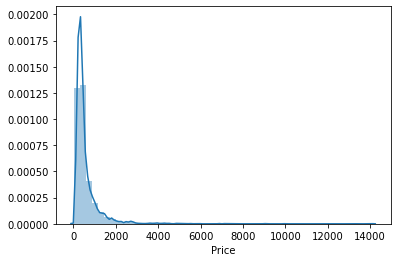

In [13]:
sns.distplot(train_data['Price'])

-0.4160487344457136


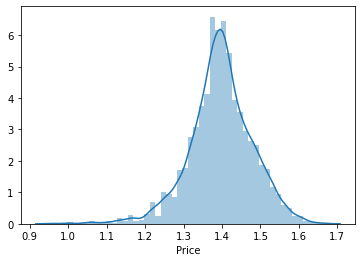

In [14]:
from scipy.stats import boxcox
train_data['Price']=boxcox(train_data.Price)[0]

target = np.log(train_data['Price'])
print (target.skew())
sns.distplot(target)

In [16]:
train_data.head()

,Author,Year,Reviews,Ratings,Price,BookCategory_Action & Adventure,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports
0,615,52,4.0,8.0,3.802107,1,0,0,0,0,0,0,0,0,0,0
1,307,48,3.9,14.0,3.763566,0,0,1,0,0,0,0,0,0,0,0
2,3390,18,4.8,6.0,3.944659,0,0,0,0,0,0,1,0,0,0,0
3,62,53,4.1,13.0,3.705549,0,0,0,0,0,1,0,0,0,0,0
4,953,42,5.0,1.0,4.436920,0,1,0,0,0,0,0,0,0,0,0


In [18]:
target

0       1.335555
1       1.325367
2       1.372362
3       1.309831
4       1.489960
          ...   
6232    1.380828
6233    1.410176
6234    1.404455
6235    1.379767
6236    1.417635
Name: Price, Length: 6237, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_data, target, test_size=0.20)

In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)

lr.fit(X_train, y_train)

LinearRegression(normalize=True)

In [21]:
y_pred = lr.predict(X_val)

In [22]:
def rmlse(y_test, y_pred):
    error = np.square(np.log10(y_pred +1) - np.log10(y_test +1)).mean() ** 0.5
    score = 1 - error
    return score

In [23]:
print("\n----------------------------\nRMLSE Score = ", rmlse(y_val, y_pred))


----------------------------
RMLSE Score =  0.9987742754160216
